# Interview Prediction DataSet

### The Dataset consists of details of 1200 + candidates and the interviews they have attended during the course of the period 2014-2016. Our goal is to Predict whether a candidate will turnup for the interview or not

### Necessary Imports for Working

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn import tree
from sklearn import utils
from sklearn import naive_bayes
from sklearn import feature_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import re


- Setting the current working directory to the working dataset folder

In [2]:
cd Desktop/Globsyn/dataset/

C:\Users\Pravash Ranjan\Desktop\Globsyn\dataset


## - Loading the dataset into the DataFrame object 
## - Glancing at the dataset and checking the column names

In [3]:
df=pd.read_csv("Interview.csv")
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


### - Checking Dataset for types of variables 
### - No of non-null values in the corresponding datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

### Observations:
- Looking into the data set , we can say that we have 1234 records with 28 columns/features
- Firstly, we can clearly eleminate the last 5 columns , which have only null values 
- Secondly, we need to shorten and modify the column in order to make the data more interpretable
- We need to clean the data before modelling

### In the following steps we carry out our observation

In [5]:
df.drop(["Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],axis=1,inplace=True)
df.columns=["date","client","industry","location","position","skills","inter_type","ID","gender","curr_location","job_location",
           "venue","native_location","permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected",
           "observed","married"]

## Unclean Date part

In [6]:
df.date.value_counts().sort_values(ascending=False)

06.02.2016               220
04/12/16                  86
13.04.2016                84
25.06.2015                43
02.09.2016                43
21.4.16                   38
22.01.2016                34
07.05.2016                31
03.04.2015                30
14.01.2016                28
26.02.2016                26
27.02.2016                26
20.08.2016                25
05/11/2016                25
25.5.2016                 24
23.02.2016                22
02.12.2015                19
19.06.2015                18
19.03.16                  17
30.01.2016                16
13.06.2016                15
09-01-2016                15
21.4.2016                 14
25-5-2016                 14
30.1.16                   14
11.5.16                   14
13/03/2015                13
22.03.2016                13
25.05.2016                12
3.6.16                    12
                        ... 
21/04/16                   2
03/06/16                   2
10.5.16                    2
24.05.2016    

### Data Cleaning of the Date column

In [7]:
df.date=df.date.str.replace(" ","")
df.date=df.date.str.replace(r'\d\d\d\d&\d\d\.\d\d\w\w',"2016")
df.date=df.date=df.date.str.replace("/",".")
df.date=df.date.str.replace(r'\WApr\W',".04.")
df.date=df.date.str.replace('Apr',".04.")
df.date=df.date.str.replace(r'\d\d\d\d&\d\.\d\d\w\w',"2016")
df.date=df.date.str.replace('-',".")
df.date=df.date.str.replace(r'\W16',".2016")
df.date=df.date.str.replace(r'\W15',".2015")
df.drop(df[df.date.isnull()].index,inplace=True)
import datetime
def conv(s):
    ar=str(s).split(".")
    try:
        d=datetime.date(int(ar[2]),int(ar[1]),int(ar[0]))
    except Exception:
        print(len(ar),s)
    return (d)
df["new_date"]=df.date.apply(conv)
df["new_date"]=pd.to_datetime(df.new_date)

### Similarly cleaning the rest of the data

#### For now we are removing all the 253 null values we have in our data set. Later on, we shall impute the null values and see 
#### if we get any better results

In [8]:
df.drop(df[df.expected.isnull()].index,inplace=True)
df.drop("date",axis=1,inplace=True)
df.client.replace({"Standard Chartered Bank Chennai":"Standard Chartered Bank","Aon hewitt Gurgaon":"Aon Hewitt","Hewitt":"Aon Hewitt"},inplace=True)
df.industry.replace({"IT Products and Services":"IT","IT Services":"IT"},inplace=True)
df.location.replace({"CHENNAI":"Chennai","chennai":"Chennai","Gurgaonr":"Gurgaon","- Cochin- ":"Cochin","chennai ":"Chennai"},inplace=True)
df=df[df.new_date<'2019-01-01']
df.drop(df[(df.hope.isnull()) & (df.three_hours.isnull()) & (df.alt_number.isnull()) & (df.resume.isnull()) & (df.clear_about_venue.isnull())& (df.letter.isnull())].index,inplace=True)
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)
for i,s in df.iterrows():
    if (df["expected"][i]=="Uncertain"):
        df["expected"][i]=df["observed"][i]
df.permission.replace({"Yes":1,"No":0},inplace=True)
df.hope.replace({"Yes":1,"No":0},inplace=True)
df.three_hours.replace({"Yes":1,"No":0},inplace=True)
df.alt_number.replace({"Yes":1,"No":0},inplace=True)
df.resume.replace({"Yes":1,"No":0},inplace=True)
df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
df.letter.replace({"Yes":1,"No":0},inplace=True)
df.expected.replace({"Yes":1,"No":0},inplace=True)
df.observed.replace({"Yes":1,"No":0},inplace=True)
df.married.replace({"Married":1,"Single":0},inplace=True)
df.drop(df[(df.permission.isnull()) | (df.hope.isnull()) | (df.three_hours.isnull()) | 
         (df.alt_number.isnull()) | (df.resume.isnull()) | (df.clear_about_venue.isnull()) |
        (df.letter.isnull()) | (df.expected.isnull()) | (df.observed.isnull())].index,inplace=True)
df.inter_type.replace({"Scheduled Walkin":"Scheduled","Scheduled ":"Scheduled","Scheduled Walk In":"Scheduled","Walkin ":"Walkin"},inplace=True)
df.curr_location.replace({"chennai":"Chennai","chennai ":"Chennai","CHENNAI":"Chennai"},inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 23 columns):
client               981 non-null object
industry             981 non-null object
location             981 non-null object
position             981 non-null object
skills               981 non-null object
inter_type           981 non-null object
ID                   981 non-null object
gender               981 non-null object
curr_location        981 non-null object
job_location         981 non-null object
venue                981 non-null object
native_location      981 non-null object
permission           981 non-null float64
hope                 981 non-null float64
three_hours          981 non-null float64
alt_number           981 non-null float64
resume               981 non-null float64
clear_about_venue    981 non-null float64
letter               981 non-null float64
expected             981 non-null int64
observed             981 non-null int64
married              981 non

### After cleaning we have :
- 23 columns all of which are non-ordinal categorical in nature
- We have 12 columns which are of object-data type

### Creating copies of the cleaned data to carry out different models

In [10]:
df1=df.copy(deep=True)
df2=df.copy(deep=True)
df3=df.copy(deep=True)
df4=df.copy(deep=True)
df5=df.copy(deep=True)
df6=df.copy(deep=True)
df7=df.copy(deep=True)

In [11]:
def freq(sr):
    return sr.value_counts().sort_values(ascending=False)

In [12]:
for col in df1.columns[:12]:
    print(freq(df1[col]))
    print()

Standard Chartered Bank    725
Hospira                     61
Pfizer                      54
Aon Hewitt                  48
ANZ                         22
UST                         18
Prodapt                     17
Flextronics                 13
Williams Lea                11
Astrazeneca                  6
Barclays                     5
Woori Bank                   1
Name: client, dtype: int64

BFSI               753
Pharmaceuticals    121
IT                  77
Telecom             17
Electronics         13
Name: industry, dtype: int64

Chennai      689
Bangalore    211
Gurgaon       33
Hyderabad     24
Noida         14
Cochin         9
Delhi          1
Name: location, dtype: int64

Routine                804
Niche                  131
Dot Net                 18
Trade Finance           11
AML                      8
Selenium testing         5
Production- Sterile      4
Name: position, dtype: int64

JAVA/J2EE/Struts/Hibernate                198
Fresher                                  

### Analysis:
- The columns of [ skills , ID , native_location ] seems quite unimportant, so we will exclude it 
- Firstly, we will label encode the object type columns after dropping these

In [13]:
df1.drop(["skills","ID","native_location"],axis=1,inplace=True)

In [14]:
print(df1.client.value_counts().sort_values(ascending=False).index)

Index(['Standard Chartered Bank', 'Hospira', 'Pfizer', 'Aon Hewitt', 'ANZ',
       'UST', 'Prodapt', 'Flextronics', 'Williams Lea', 'Astrazeneca',
       'Barclays', 'Woori Bank'],
      dtype='object')


## Label Encoding

In [15]:
def label_encode(df1,cols):
    #df1.info()
    for i in cols:
        d=dict()
        a=list(df1[i].value_counts().sort_values(ascending=False).index)
        #print(len(a)
        for j in range(0,len(a)):
            try:
                d[a[j]]=len(a)-j+1
            except:
                print(j)
        df1[i].replace(d,inplace=True)
    #df1.info()
    return df1

In [16]:
df1.head()

,client,industry,location,position,inter_type,gender,curr_location,job_location,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married,new_date
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Hosur,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Bangalore,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Chennai,Hosur,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,2015-02-13
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Bangalore,Hosur,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,1,2015-02-13
5,Aon Hewitt,IT,Gurgaon,Selenium testing,Scheduled,Male,Gurgaon,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13


In [17]:
label_encode(df1,["client","industry","position","inter_type","gender","curr_location","job_location","venue"])


,client,industry,location,position,inter_type,gender,curr_location,job_location,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married,new_date
0,12,5,Chennai,2,3,3,8,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
1,12,5,Chennai,2,3,3,8,7,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
3,12,5,Chennai,2,3,3,8,8,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,2015-02-13
4,12,5,Chennai,2,3,3,8,7,2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,1,2015-02-13
5,10,4,Gurgaon,3,3,3,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13
6,10,4,Gurgaon,3,3,3,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13
7,10,4,Gurgaon,3,3,2,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13
8,10,4,Gurgaon,3,3,3,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13
9,10,4,Gurgaon,3,3,2,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
10,8,4,Bangalore,6,3,3,7,7,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-06-19


In [18]:
df1.head()

,client,industry,location,position,inter_type,gender,curr_location,job_location,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married,new_date
0,12,5,Chennai,2,3,3,8,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
1,12,5,Chennai,2,3,3,8,7,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,2015-02-13
3,12,5,Chennai,2,3,3,8,8,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,2015-02-13
4,12,5,Chennai,2,3,3,8,7,2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,1,2015-02-13
5,10,4,Gurgaon,3,3,3,6,6,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,2015-02-13


### Dropping location because it is the same as curr_location

In [19]:
df1.drop("location",axis=1,inplace=True)

## Function to plot graph to see how Precision varies with no of features using DECISION TREE (RFECV)

In [20]:
from sklearn import feature_selection
def get_feat_dt(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=tree.DecisionTreeClassifier()
    n=X.shape[1]
    tr_score=[]
    ts_score=[]
    for i in range(1,n):
        rfecv=feature_selection.RFE(model,n_features_to_select=i)
        rfecv.fit(X_train,y_train)
        col=X.columns[rfecv.get_support()]
        model.fit(X_train[col],y_train)
        tr_p=model.predict(X_train[col])
        ts_p=model.predict(X_test[col])
        tr_score.append(metrics.precision_score(y_train,tr_p))
        ts_score.append(metrics.precision_score(y_test,ts_p))
    plt.figure()
    plt.plot(range(1,n),tr_score)
    plt.plot(range(1,n),ts_score)
    plt.xlabel("min_features using Decison Tree")
    plt.ylabel("Precision")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.7,.8)
    plt.show()
    

## Function to plot graph to see how Precision varies with no of features using RANDOM FOREST (RFECV)

In [21]:
def get_feat_rf(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=ensemble.RandomForestClassifier()
    n=X.shape[1]
    tr_score=[]
    ts_score=[]
    for i in range(1,n):
        rfecv=feature_selection.RFE(model,n_features_to_select=i)
        rfecv.fit(X_train,y_train)
        col=X.columns[rfecv.get_support()]
        model.fit(X_train[col],y_train)
        tr_p=model.predict(X_train[col])
        ts_p=model.predict(X_test[col])
        tr_score.append(metrics.precision_score(y_train,tr_p))
        ts_score.append(metrics.precision_score(y_test,ts_p))
    plt.figure()
    plt.plot(range(1,n),tr_score)
    plt.plot(range(1,n),ts_score)
    plt.xlabel("min_features using Random Forest")
    plt.ylabel("Precision")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.7,.8)
    plt.show()
    

In [67]:
def run_rf(X,y,i):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=ensemble.RandomForestClassifier()
    rfecv=feature_selection.RFE(model,n_features_to_select=i)
    rfecv.fit(X_train,y_train)
    col=X.columns[rfecv.get_support()]
    model.fit(X_train[col],y_train)
    tr_p=model.predict(X_train[col])
    ts_p=model.predict(X_test[col])
    print(i)
    print("Train Set")
    print("precison",metrics.precision_score(y_train,tr_p)*100)
    print("recall",metrics.recall_score(y_train,tr_p)*100)
    print("accuracy",metrics.accuracy_score(y_train,tr_p)*100)
    print("log loss",metrics.log_loss(y_train,model.predict_proba(X_train[col])))
    print("Test Set")
    print("precision",metrics.precision_score(y_test,ts_p)*100)
    print("recall",metrics.recall_score(y_test,ts_p)*100)
    print("acuuracy",metrics.accuracy_score(y_test,ts_p)*100)
    print("log loss",metrics.log_loss(y_test,model.predict_proba(X_test[col])))

In [68]:
def run_dt(X,y,i):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=tree.DecisionTreeClassifier()
    rfecv=feature_selection.RFE(model,n_features_to_select=i)
    rfecv.fit(X_train,y_train)
    col=X.columns[rfecv.get_support()]
    model.fit(X_train[col],y_train)
    tr_p=model.predict(X_train[col])
    ts_p=model.predict(X_test[col])
    print(i)
    print("Train Set")
    print("precison",metrics.precision_score(y_train,tr_p)*100)
    print("recall",metrics.recall_score(y_train,tr_p)*100)
    print("accuracy",metrics.accuracy_score(y_train,tr_p)*100)
    print("log loss",metrics.log_loss(y_train,model.predict_proba(X_train[col])))
    print("Test Set")
    print("precision",metrics.precision_score(y_test,ts_p)*100)
    print("recall",metrics.recall_score(y_test,ts_p)*100)
    print("acuuracy",metrics.accuracy_score(y_test,ts_p)*100)
    print("log loss",metrics.log_loss(y_test,model.predict_proba(X_test[col])))

## Decison Tree model variation of precision with no of features

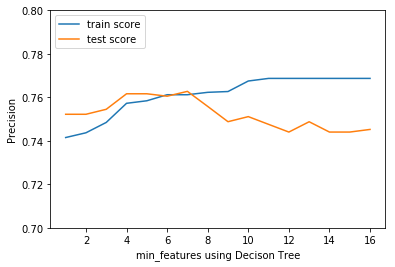

In [24]:
get_feat_dt(df1.drop(["new_date","observed"],axis=1),df1.observed)

### From the above graph we conclude that we get best resulst when using 6 features

### Running Decison Tree on those 6 features

In [25]:
run_dt(df1.drop(["new_date","observed"],axis=1),df1.observed,5)

5
Train Set
precison 75.84615384615384
recall 97.4308300395257
accuracy 76.87074829931973
log loss 0.4787137222075099
Test Set
precision 76.16822429906543
recall 97.60479041916167
acuuracy 77.64227642276423
log loss 0.8912503214392892


## Train Set
### precison 76.12403100775194
recall 97.03557312252964

accuracy 77.00680272108843

log loss 0.4674276543027783
## Test Set
### precision 76.05633802816901
recall 97.0059880239521

acuuracy 77.23577235772358

log loss 0.8961839253693558

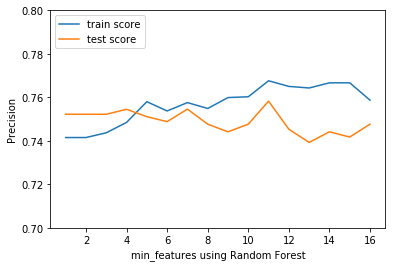

In [26]:
get_feat_rf(df1.drop(["new_date","observed"],axis=1),df1.observed)

### From the above graph we conclude that we get best resulst when using 5 features

### Running Decison Tree on those 5 features

In [69]:
run_rf(df1.drop(["new_date","observed"],axis=1),df1.observed,5)

5
Train Set
precison 75.37764350453172
recall 98.61660079051383
accuracy 76.87074829931973
log loss 0.4809369944126865
Test Set
precision 75.92592592592592
recall 98.20359281437125
acuuracy 77.64227642276423
log loss 0.8913270735904912


## Train Set
### precison 75.37764350453172
recall 98.61660079051383

accuracy 76.87074829931973

log loss 0.4809369944126865

## Test Set
### precision 75.92592592592592

recall 98.20359281437125

acuuracy 77.64227642276423

log loss 0.8913270735904912

### Function to calculate the scores of different ML models on the label encoded Data

In [28]:
def modelstats1(X,y):
    np.random.seed(42)
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=42)
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression(C=10))
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [29]:
def get_importance(X,y):
    rf=ensemble.RandomForestClassifier()
    rf.fit(X,y)
    return pd.DataFrame(rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [30]:
def rfe_selection(X,y):
    np.random.seed(42)
    rf=ensemble.RandomForestClassifier()
    train=[]
    test=[]
    loss=[]
    m=[rf]
    s=["Random Forest"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    for j in range(0,len(m)):
        #print(s[j])
        model=m[j]
        for i in range(1,30):
            rfecv=feature_selection.RFE(estimator=model,n_features_to_select=i)
            rfecv.fit(X_train,y_train)
            cols=X.columns[rfecv.get_support()]
            X_=X_train[cols]
            X_t=X_test[cols]
            rfecv.fit(X_,y_train)
            
            #model.fit(X_,y)
            #print(cols)
            train.append(metrics.precision_score(y_train,rfecv.predict(X_)))
            test.append(metrics.precision_score(y_test,rfecv.predict(X_t)))
            loss.append(metrics.log_loss(y_test,rfecv.predict_proba(X_t)))
    plt.figure()
    plt.plot(np.arange(1,30,1),train)
    plt.plot(np.arange(1,30,1),test)
    plt.title("Optimal Number of Features (Random Forest) ")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.7,.8)
    plt.show()

## Importnace of Features

In [31]:
imp=get_importance(df1.drop(["new_date","observed"],axis=1),df1.observed)
imp

,importance
expected,0.230717
permission,0.143107
position,0.088620
letter,0.085071
client,0.062203
industry,0.059242
hope,0.053178
gender,0.049577
married,0.048985
curr_location,0.043910


## Graph of optimal no of features using RFE selection method

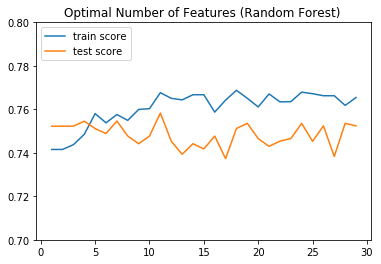

In [32]:
rfe_selection(df1.drop(["new_date","observed"],axis=1),df1.observed)

## We observe for 11 features we get the best precision

In [33]:
run_rf(df1.drop(["new_date","observed"],axis=1),df1.observed,6)

6
Train Set
precison 75.96302003081664
recall 97.4308300395257
accuracy 77.00680272108843
log loss 0.4696887011645407
Test Set
precision 75.22935779816514
recall 98.20359281437125
acuuracy 76.82926829268293
log loss 0.914759287503169


# Running  model stats on all features of X

In [34]:
modelstats1(df1.drop(["new_date","observed"],axis=1),df1.observed)

{'n_neighbors': 15}


C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.761905,0.745914,0.992095,0.622685
1,LR-test,0.772358,0.751131,0.994012,0.648905
2,DecisionTree-train,0.779592,0.768750,0.972332,0.663022
3,DecisionTree-test,0.743902,0.745283,0.946108,0.631282
4,KNN(15)-train,0.717007,0.715942,0.976285,0.560195
5,KNN(15)-test,0.699187,0.699571,0.976048,0.544986
6,NB-train,0.744218,0.739458,0.970356,0.607449
7,NB-test,0.743902,0.742991,0.952096,0.627947


# Running  model stats on top 10 features of X using rf.feature_importances

In [35]:
cols=imp[:10].index
modelstats1(df1[cols],df1.observed)

{'n_neighbors': 15}


C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.760544,0.742647,0.998024,0.616916
1,LR-test,0.764228,0.746606,0.988024,0.639582
2,DecisionTree-train,0.776871,0.763889,0.978261,0.655069
3,DecisionTree-test,0.756098,0.751174,0.958084,0.643599
4,KNN(15)-train,0.725170,0.725519,0.966403,0.579271
5,KNN(15)-test,0.707317,0.703863,0.982036,0.554309
6,NB-train,0.751020,0.742129,0.978261,0.613585
7,NB-test,0.756098,0.746544,0.970060,0.636929


# That was one part of our approach, now we will one_hot_encode all features and run the corresponding models

In [36]:
dum_cl=pd.get_dummies(df2.client,prefix="cl",drop_first=True)
dum_ind=pd.get_dummies(df2.industry,prefix="ind",drop_first=True)
dum_jbl=pd.get_dummies(df2.job_location,prefix="jbl",drop_first=True)
#dum_loc=pd.get_dummies(df2.location,prefix="loc",drop_first=True)
dum_pos=pd.get_dummies(df2.position,prefix="pos",drop_first=True)
#dum_skills=pd.get_dummies(df2.skills,prefix="skills",drop_first=True)
dum_int_type=pd.get_dummies(df2.inter_type,prefix="int_type",drop_first=True)
dum_gender=pd.get_dummies(df2.gender,prefix="gender",drop_first=True)
#dum_curr=pd.get_dummies(df2.curr_location,prefix="curr",drop_first=True)
dum_venue=pd.get_dummies(df2.venue,prefix="venue",drop_first=True)


In [37]:
df2=pd.concat([df2,dum_cl,dum_gender,dum_ind,dum_int_type,dum_jbl,dum_pos,dum_venue],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 58 columns):
client                        981 non-null object
industry                      981 non-null object
location                      981 non-null object
position                      981 non-null object
skills                        981 non-null object
inter_type                    981 non-null object
ID                            981 non-null object
gender                        981 non-null object
curr_location                 981 non-null object
job_location                  981 non-null object
venue                         981 non-null object
native_location               981 non-null object
permission                    981 non-null float64
hope                          981 non-null float64
three_hours                   981 non-null float64
alt_number                    981 non-null float64
resume                        981 non-null float64
clear_about_venue             981 non-n

## Dropping features that we have already one_hot_encoded

In [38]:
df2.drop(["client","industry","location","position","inter_type","gender","curr_location","job_location","venue","native_location"],axis=1,inplace=True)

## Again here we exclude skills and date column , which shall be analysed later

In [39]:
df2.drop(["skills","ID","new_date"],axis=1,inplace=True)

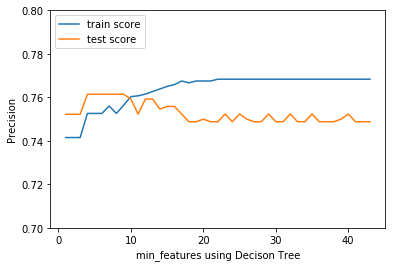

In [40]:
get_feat_dt(df2.drop("observed",axis=1),df2.observed)

## From graph we see that we get best results when min_features=10 with Decision Tree


In [41]:
run_dt(df2.drop("observed",axis=1),df2.observed,11)

11
Train Set
precison 76.15384615384615
recall 97.82608695652173
accuracy 77.41496598639456
log loss 0.469821757139205
Test Set
precision 75.57603686635944
recall 98.20359281437125
acuuracy 77.23577235772358
log loss 0.7599505821184575


## Train Set
### precison 75.642965204236

## Test Set
### precision 75.79908675799086

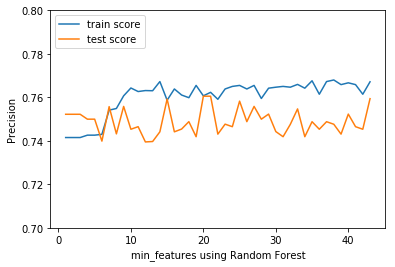

In [42]:
get_feat_rf(df2.drop("observed",axis=1),df2.observed)

## From graph we see that we get best results when min_features=16 with Random Forest


In [43]:
run_rf(df2.drop("observed",axis=1),df2.observed,9)

9
Train Set
precison 75.92592592592592
recall 97.23320158102767
accuracy 76.87074829931973
log loss 0.47503783842379543
Test Set
precision 75.0
recall 97.0059880239521
acuuracy 76.01626016260163
log loss 0.6459950710174792


## Train Set
### precison 75.91463414634147
## Test Set
### precision 75.0

## Now we run ModelStats to try other models

## Running ModelStats on all features

In [44]:
modelstats1(df2.drop("observed",axis=1),df2.observed)

{'n_neighbors': 7}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.768707,0.758462,0.974308,0.644359
1,LR-test,0.772358,0.758140,0.976048,0.658910
2,DecisionTree-train,0.778231,0.768388,0.970356,0.662034
3,DecisionTree-test,0.752033,0.750000,0.952096,0.640605
4,KNN(7)-train,0.759184,0.750381,0.974308,0.629076
5,KNN(7)-test,0.735772,0.731818,0.964072,0.608618
6,NB-train,0.405442,0.948052,0.144269,0.563401
7,NB-test,0.382114,0.857143,0.107784,0.534905


## Running ModelStats on top 10 features 

In [45]:
imp=get_importance(df2.drop("observed",axis=1),df2.observed)
cols=imp[:10].index
modelstats1(df2[cols],df2.observed)

{'n_neighbors': 15}


C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.757823,0.741888,0.994071,0.614940
1,LR-test,0.768293,0.750000,0.988024,0.645911
2,DecisionTree-train,0.761905,0.748126,0.986166,0.626271
3,DecisionTree-test,0.752033,0.743119,0.970060,0.630600
4,KNN(15)-train,0.752381,0.737537,0.994071,0.606206
5,KNN(15)-test,0.760163,0.741071,0.994012,0.629917
6,NB-train,0.749660,0.739583,0.982213,0.609011
7,NB-test,0.752033,0.745370,0.964072,0.633935


## Now we shall inpute the null values and run our models over it.
## This time we will take the entire data set without removing any records

In [46]:
df=pd.read_csv("Interview.csv")

In [47]:
df.drop(["Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],axis=1,inplace=True)
df.columns=["date","client","industry","location","position","skills","inter_type","ID","gender","curr_location","job_location",
           "venue","native_location","permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected",
           "observed","married"]


In [48]:
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)
    

In [49]:
df[df.observed=="Yes"]

,date,client,industry,location,position,skills,inter_type,ID,gender,curr_location,...,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
10,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 11,Male,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
12,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 13,Male,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
13,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 14,Male,Bangalore,...,No,Yes,Yes,Yes,Yes,Yes,No,Uncertain,Yes,Single
14,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 15,Male,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
15,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 16,Female,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
16,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 17,Female,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single


In [50]:
d=(df[df.observed=="Yes"])
d[(d.permission=="Yes") & (d.three_hours=="Yes") & (d.resume=="Yes") & (d.letter=="Yes") & (d.hope=="Yes")
 & (d.alt_number=="Yes") & (d.clear_about_venue=="Yes")].shape[0]/d.shape[0]*100

83.39719029374201

In [51]:
d1=(df[df.observed=="No"])
d1[(d1.permission=="Yes") & (d1.three_hours=="Yes") & (d1.resume=="Yes") & (d1.letter=="Yes") & (d1.hope=="Yes")
 & (d1.alt_number=="Yes") & (d1.clear_about_venue=="Yes")].shape[0]/d1.shape[0]*100

51.11111111111111

In [52]:
for col in d.columns:
    print(col)
    print(d[col].value_counts().sort_values(ascending=False))
    print()

date
06.02.2016               148
04/12/16                  59
13.04.2016                50
21.4.16                   27
02.09.2016                27
25.06.2015                27
07.05.2016                24
22.01.2016                22
14.01.2016                19
20.08.2016                16
25.5.2016                 16
26.02.2016                14
27.02.2016                13
05/11/2016                13
07.06.2016                12
09-01-2016                12
25-5-2016                 11
30.01.2016                11
02.12.2015                11
23.02.2016                11
11.5.16                   10
19.06.2015                10
19.03.16                  10
13.06.2016                10
25.05.2016                 9
25.05.16                   9
3.6.16                     8
30.1.16                    8
17.03.2015                 7
17/03/2015                 7
                        ... 
25-05-2016                 2
19 Apr 16                  2
13/03/2015                 2
15 Apr 16

In [53]:
for col in d1.columns:
    print(col)
    print(d1[col].value_counts().sort_values(ascending=False))
    print()

date
06.02.2016               72
13.04.2016               34
04/12/16                 27
03.04.2015               23
25.06.2015               16
02.09.2016               16
27.02.2016               13
22.01.2016               12
26.02.2016               12
05/11/2016               12
23.02.2016               11
13/03/2015               11
21.4.16                  11
14.01.2016                9
20.08.2016                9
25.5.2016                 8
19.06.2015                8
02.12.2015                8
07.05.2016                7
19.03.16                  7
21.4.2016                 7
13.02.2015                6
30.1.16                   6
4.04.15                   6
22.03.2016                6
13.06.2016                5
30.01.2016                5
3.6.16                    4
11.5.16                   4
15 Apr 16                 4
                         ..
25 Apr 16                 3
10.05.2016                3
05/02/15                  3
25 – Apr-16               2
21.4.15        

## Observations:
- Most of the null values are present in the columns [permission,three_hours,resume,letter,hope,alt_number,clear_about_venue]
- From above results we see that from all the people who turned up for the interview 83% had shared all their details of the above mentioned columns
- Therefore, we may assume that if a person has arrived for the interview , then there is a high chance(83%) that he must have shared all his details
- Interestingly, those who did not turn up for the interview have a 51% chance of not turning up
- From the above outputs it reflects that conditons which made people come for the interviews are the same reasons for them not turning up for the interview
- This means people who had shared their details but still didnt turn up, may be caused by different factors which is not present in our current data set
- Therefore, we just fill No for those who did not turn up for the interview

In [54]:
for idx,ser in df.iterrows():
    if((ser.hope!="Yes") & (ser.hope!="No")):
        if(ser.observed=="Yes"):
            df["hope"][idx]="Yes"
        else:
            df["hope"][idx]="No"
    if((ser.letter!="Yes") & (ser.letter!="No")):
        if(ser.observed=="Yes"):
            df["letter"][idx]="Yes"
        else:
            df["letter"][idx]="No"
            
    if((ser.three_hours!="Yes") & (ser.three_hours!="No")):
        if(ser.observed=="Yes"):
            df["three_hours"][idx]="Yes"
        else:
            df["three_hours"][idx]="No"
            
    if((ser.alt_number!="Yes") & (ser.alt_number!="No")):
        if(ser.observed=="Yes"):
            df["alt_number"][idx]="Yes"
        else:
            df["alt_number"][idx]="No"
            
    if((ser.resume!="Yes") & (ser.resume!="No")):
        if(ser.observed=="Yes"):
            df["resume"][idx]="Yes"
        else:
            df["resume"][idx]="No"
            
    if((ser.clear_about_venue!="Yes") & (ser.clear_about_venue!="No")):
        if(ser.observed=="Yes"):
            df["clear_about_venue"][idx]="Yes"
        else:
            df["clear_about_venue"][idx]="No"
            
    if((ser.permission!="Yes") & (ser.permission!="No")):
        if(ser.observed=="Yes"):
            df["permission"][idx]="Yes"
        else:
            df["permission"][idx]="No"
    

## Data cleaning stuff

In [55]:
df.date=df.date.str.replace(" ","")
df.date=df.date.str.replace(r'\d\d\d\d&\d\d\.\d\d\w\w',"2016")
df.date=df.date=df.date.str.replace("/",".")
df.date=df.date.str.replace(r'\WApr\W',".04.")
df.date=df.date.str.replace('Apr',".04.")
df.date=df.date.str.replace(r'\d\d\d\d&\d\.\d\d\w\w',"2016")
df.date=df.date.str.replace('-',".")
df.date=df.date.str.replace(r'\W16',".2016")
df.date=df.date.str.replace(r'\W15',".2015")
df.drop(df[df.date.isnull()].index,inplace=True)
import datetime
def conv(s):
    ar=str(s).split(".")
    try:
        d=datetime.date(int(ar[2]),int(ar[1]),int(ar[0]))
    except Exception:
        print(len(ar),s)
    return (d)
df["new_date"]=df.date.apply(conv)
df["new_date"]=pd.to_datetime(df.new_date)

In [56]:
df.drop(df[df.expected.isnull()].index,inplace=True)
df.drop("date",axis=1,inplace=True)
df.client.replace({"Standard Chartered Bank Chennai":"Standard Chartered Bank","Aon hewitt Gurgaon":"Aon Hewitt","Hewitt":"Aon Hewitt"},inplace=True)
df.industry.replace({"IT Products and Services":"IT","IT Services":"IT"},inplace=True)
df.location.replace({"CHENNAI":"Chennai","chennai":"Chennai","Gurgaonr":"Gurgaon","- Cochin- ":"Cochin","chennai ":"Chennai"},inplace=True)
df=df[df.new_date<'2019-01-01']
df.drop(df[(df.hope.isnull()) & (df.three_hours.isnull()) & (df.alt_number.isnull()) & (df.resume.isnull()) & (df.clear_about_venue.isnull())& (df.letter.isnull())].index,inplace=True)
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)
for i,s in df.iterrows():
    if (df["expected"][i]=="Uncertain"):
        df["expected"][i]=df["observed"][i]
df.permission.replace({"Yes":1,"No":0},inplace=True)
df.hope.replace({"Yes":1,"No":0},inplace=True)
df.three_hours.replace({"Yes":1,"No":0},inplace=True)
df.alt_number.replace({"Yes":1,"No":0},inplace=True)
df.resume.replace({"Yes":1,"No":0},inplace=True)
df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
df.letter.replace({"Yes":1,"No":0},inplace=True)
df.expected.replace({"Yes":1,"No":0},inplace=True)
df.observed.replace({"Yes":1,"No":0,"NO":0},inplace=True)
df.married.replace({"Married":1,"Single":0},inplace=True)
df.drop(df[(df.permission.isnull()) | (df.hope.isnull()) | (df.three_hours.isnull()) | 
         (df.alt_number.isnull()) | (df.resume.isnull()) | (df.clear_about_venue.isnull()) |
        (df.letter.isnull()) | (df.expected.isnull()) | (df.observed.isnull())].index,inplace=True)
df.inter_type.replace({"Scheduled Walkin":"Scheduled","Scheduled ":"Scheduled","Scheduled Walk In":"Scheduled","Walkin ":"Walkin"},inplace=True)
df.curr_location.replace({"chennai":"Chennai","chennai ":"Chennai","CHENNAI":"Chennai"},inplace=True)


## Label encoding

In [62]:
label_encode(df,["client","industry","position","inter_type","gender","curr_location","job_location","venue"])


,client,industry,location,position,skills,inter_type,ID,gender,curr_location,job_location,...,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married,new_date
0,12,5,Chennai,2,Routine,4,Candidate 1,3,8,2,...,1,1,1,1,1,1,1,0,0,2015-02-13
1,12,5,Chennai,2,Routine,4,Candidate 2,3,8,7,...,1,1,1,1,1,1,1,0,0,2015-02-13
2,12,5,Chennai,2,Routine,4,Candidate 3,3,8,8,...,0,0,0,0,0,0,0,0,0,2015-02-13
3,12,5,Chennai,2,Routine,4,Candidate 4,3,8,8,...,1,0,1,0,1,1,0,0,0,2015-02-13
4,12,5,Chennai,2,Routine,4,Candidate 5,3,8,7,...,1,1,0,1,1,1,0,0,1,2015-02-13
5,10,4,Gurgaon,3,Routine,4,Candidate 6,3,5,6,...,1,1,1,1,1,1,1,1,0,2015-02-13
6,10,4,Gurgaon,3,Routine,4,Candidate 7,3,5,6,...,1,1,1,1,1,1,1,1,0,2015-02-13
7,10,4,Gurgaon,3,Routine,4,Candidate 8,2,5,6,...,1,1,1,1,1,1,1,1,0,2015-02-13
8,10,4,Gurgaon,3,Routine,4,Candidate 9,3,5,6,...,1,1,1,1,1,1,1,1,0,2015-02-13
9,10,4,Gurgaon,3,Routine,4,Candidate 10,2,5,6,...,1,1,1,1,1,1,1,0,0,2015-02-13


In [63]:
df.drop(["location","skills","ID","native_location"],axis=1,inplace=True)

## Observing variation in Precision using Decision Tree

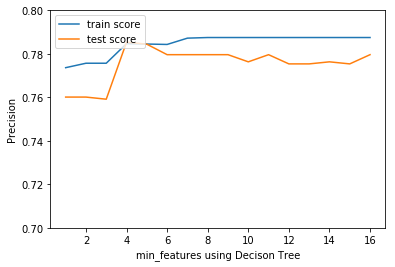

In [64]:
get_feat_dt(df.drop(["new_date","observed"],axis=1),df.observed)

## From above graph we see we get max value when no.of features = 5

In [70]:
run_dt(df.drop(["new_date","observed"],axis=1),df.observed,5)

5
Train Set
precison 78.45528455284553
recall 98.30220713073004
accuracy 81.57033805888769
log loss 0.4077168658117821
Test Set
precision 78.54077253218884
recall 97.86096256684492
acuuracy 82.35294117647058
log loss 0.8186155442980535


## Train Precision 78.45528455284553%
## Test Precision   78.54077253218884%

## Observing variation in Precision using Random Forest

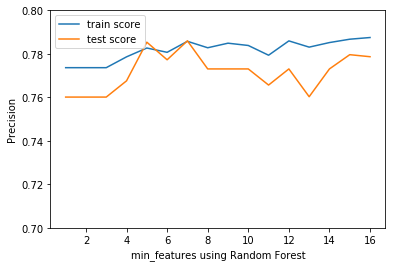

In [71]:
get_feat_rf(df.drop(["new_date","observed"],axis=1),df.observed)

## From above graph we see we get max value when no.of features = 6

In [73]:
run_rf(df.drop(["new_date","observed"],axis=1),df.observed,6)

6
Train Set
precison 78.50340136054422
recall 97.96264855687606
accuracy 81.46128680479825
log loss 0.4091287494423977
Test Set
precision 78.54077253218884
recall 97.86096256684492
acuuracy 82.35294117647058
log loss 0.8263935179969971


## Train Precision 78.50340136054422%
## Test Precision   78.54077253218884%

## Now we shall one_hot_encode all features and run our tests on it

In [75]:
dff=df.copy(deep=True)

In [76]:
dum_cl=pd.get_dummies(dff.client,prefix="cl",drop_first=True)
dum_ind=pd.get_dummies(dff.industry,prefix="ind",drop_first=True)
dum_jbl=pd.get_dummies(dff.job_location,prefix="jbl",drop_first=True)
#dum_loc=pd.get_dummies(df2.location,prefix="loc",drop_first=True)
dum_pos=pd.get_dummies(dff.position,prefix="pos",drop_first=True)
#dum_skills=pd.get_dummies(df2.skills,prefix="skills",drop_first=True)
dum_int_type=pd.get_dummies(dff.inter_type,prefix="int_type",drop_first=True)
dum_gender=pd.get_dummies(dff.gender,prefix="gender",drop_first=True)
#dum_curr=pd.get_dummies(df2.curr_location,prefix="curr",drop_first=True)
dum_venue=pd.get_dummies(dff.venue,prefix="venue",drop_first=True)

dum_p=pd.get_dummies(dff.permission,prefix="p",drop_first=True)
dum_h=pd.get_dummies(dff.hope,prefix="h",drop_first=True)
dum_t=pd.get_dummies(dff.three_hours,prefix="t",drop_first=True)
dum_a=pd.get_dummies(dff.alt_number,prefix="a",drop_first=True)
dum_r=pd.get_dummies(dff.resume,prefix="r",drop_first=True)
dum_l=pd.get_dummies(dff.letter,prefix="l",drop_first=True)
dum_c=pd.get_dummies(dff.clear_about_venue,prefix="c",drop_first=True)
dum_e=pd.get_dummies(dff.expected,prefix="e",drop_first=True)
dum_m=pd.get_dummies(dff.married,prefix="m",drop_first=True)


dff=pd.concat([dff,dum_cl,dum_gender,dum_ind,dum_int_type,dum_jbl,dum_pos,dum_venue,
              dum_p,dum_h,dum_t,dum_a,dum_r,dum_l,dum_c,dum_e,dum_m],axis=1)
#df2.info()



## Dropping one_hot_encoded features

In [78]:
dff.drop(["industry","position","inter_type","gender","curr_location","job_location","venue",
         "permission","hope","resume","letter","three_hours","alt_number","clear_about_venue",
         "expected","married"],axis=1,inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1232
Data columns (total 48 columns):
client        1223 non-null int64
observed      1223 non-null int64
new_date      1223 non-null datetime64[ns]
cl_3          1223 non-null uint8
cl_4          1223 non-null uint8
cl_5          1223 non-null uint8
cl_6          1223 non-null uint8
cl_7          1223 non-null uint8
cl_8          1223 non-null uint8
cl_9          1223 non-null uint8
cl_10         1223 non-null uint8
cl_11         1223 non-null uint8
cl_12         1223 non-null uint8
cl_13         1223 non-null uint8
gender_3      1223 non-null uint8
ind_3         1223 non-null uint8
ind_4         1223 non-null uint8
ind_5         1223 non-null uint8
ind_6         1223 non-null uint8
int_type_3    1223 non-null uint8
int_type_4    1223 non-null uint8
jbl_3         1223 non-null uint8
jbl_4         1223 non-null uint8
jbl_5         1223 non-null uint8
jbl_6         1223 non-null uint8
jbl_7         1223 non-null uint8


In [79]:
dff.drop(["client","new_date"],axis=1,inplace=True)

## Variation in Precision using Decision Tree

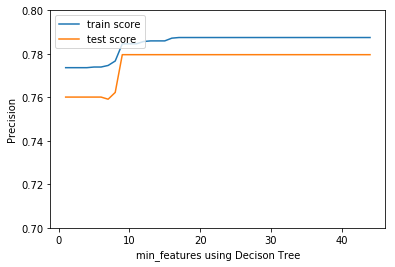

In [80]:
get_feat_dt(dff.drop("observed",axis=1),dff.observed)

## From graph we observe that we get max Precision when no of features =10

In [81]:
run_dt(dff.drop("observed",axis=1),dff.observed,10)

10
Train Set
precison 78.49462365591397
recall 99.15110356536503
accuracy 82.00654307524536
log loss 0.4046418620663424
Test Set
precision 77.96610169491525
recall 98.3957219251337
acuuracy 82.02614379084967
log loss 0.6309200813632269


## Variation in Precision using Decision Tree

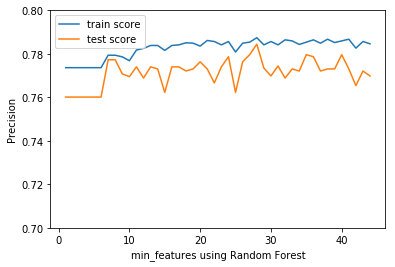

In [82]:
get_feat_rf(dff.drop("observed",axis=1),dff.observed)

## From graph we observe that we get max Precision when no of features =8

In [90]:
run_rf(dff.drop("observed",axis=1),dff.observed,8)

8
Train Set
precison 77.57255936675462
recall 99.830220713073
accuracy 81.35223555070883
log loss 0.41864789761555743
Test Set
precision 76.01626016260163
recall 100.0
acuuracy 80.71895424836602
log loss 0.5451045690373372
